### ECE 594N: Homework 3 Paper Review

# Discrete extended Kalman filter on lie groups


### by Christos Zangos


# Introduction

Considering the assumption that the geometry of a manifold can boost the performance of models $\textit{Bourmaud et al.}$ [1] propose a generalization of the Extended Kalman Filter (EKF) by leveraging the properties of Lie Groups (Manifolds) in order to tackle the problem of estimating a state that evolves on a manifold. The proposed method can be adjusted to specific applications by designing the Lie Group on which the state is defined. In order to achieve that, the authors take advantage of the Concentrated Gaussian Distribution on Lie Groups which should be considered as a generalization of the normal distribution in Euclidean space which is used in the Discrete Extended Kalman filter.

However, the idea of extending discrete Euclidean filtering algorithms to manifolds is not new. In [2] the authors proposed a method for applying particle filters (sequential Monte Carlo) for the estimation of Markov processes on the Stiefel Manifold from data observed on the Euclidean space. In a similar context [3] proposes an efficient way of implementing the particle filtering technique that significantly reduces the spatial complexity per particle. Their goal is to apply this method on a stochastic piecewise constant velocity model on the Grassmannian manifold. In [4] $\textit{Bourmaud et al.}$ based on the idea that most physical models are described by ordinary differential equations, while measurements are usually discrete, they propose an even more generalized approach of [1], the Continuous-Discrete Extended Kalman Filter on Matrix Lie Groups using concentrated Gaussian Distributions. In [8] an extension of Gaussian distributions has also been developed and used for Bayesian filtering on Lie groups. However, similarly to [1] it does not address the invariance properties of certain systems on Lie Groups. In order to address the limitation of [1] on retaining the symmetric-preserving properties [9] extends the concepts of the state
and noise of the multistate constraint Kalman filter from Euclidean space to matrix Lie Group space. Finally, in [5] an extension of the unscented Kalman filter to Riemannian manifolds is proposed, based on the idea that the unscented transform provides practical generalization properties. 

# Background 


A Lie group is a group that is also a finite-dimensional real smooth manifold, meaning that the group operations of multiplication and inversion constitute smooth maps. 

The Concentrated Gaussian Distribution (CGD) on Lie Groups can be defined as 

$\begin{align*} 
ρ(X) = αe^{-\frac{log_{G}(X)_{G}^{V}P^{-1}log_{G}(X)_{G}^{V}}{2}}
\end{align*}$


where α is a normalizing constant, $X \in G$ , G is a pdimensional Lie group and P is a definite positive matrix.


The advantage of CGD is that we are able to transform the uncertainty in the chart of G into the uncertainty in G. Concretely, the mean of the Gaussian distribution on the manifold can be computed in the manifold, maintaining the special structure of the manifold, while the associated uncertainties can be handled in the chart of the manifold.

### System Model

The state of the system is defined as

$\begin{align*} 
X_{k} & = f(X_{k-1}, u_{k-1}, n_{k-1}) \\\\
& = X_{k-1}exp_{G}([Ω(X_{k-1}, u_{k-1})+n_{k-1}]^{Λ}_{G})
\end{align*}$


where $X_{k} \in G$ is the state we wish to estimate at time k and
G is a p-dimensional Lie group. $u_{k-1} \in \mathbb{N}^{\mathscr{w}}$ corresponds to
a control input and $n_{k-1} \sim \mathscr{N}_{\mathbb{R}^p}( \textbf{0}_{p\times n},R_{k-1})$ is a white Gaussian noise. $Ω:G\times \mathbb{R}^w\rightarrow \mathbb{R}^p$ is a non-linear $\mathscr{C}^2$ function.


## Proposed method


The state posterior distribution at time k −1 is represented as $\mathscr{N}_{G}(\mu_{k-1|k-1}, P_{k-1|k-1})$. The goal is to propagate $\mu_{k-1|k-1}$ and $P_{k-1|k-1}$ between two consecutive sensor measurements


The $\textit{state estimate}$ is propagated using the state model without noise

$\mu_{k|k-1}=\mu_{k-1|k-1} exp_{G} ([\hat{Ω}_{k-1}]^{Λ}_{G})$ 

where     $ \hat{Ω}_{k-1} = Ω(\mu_{k-1},u_{k-1})$.


The $\textit{covariance}$ is propagated as 



$\begin{align*}P_{k|k-1} & =E[ε_{k|k-1}ε^{T}_{k|k-1}]\\\\
& = \mathscr{F}_{k-1}P_{k-1|k-1}\mathscr{F}^{T}_{k-1}+Φ_{G}(\hat{Ω}_{k-1})R_{k-1}Φ_{G}(\hat{Ω}_{k-1})^{T}
\end{align*}$

where

$\mathscr{F}_{k-1}=Ad_{G}(exp_{G}(-\hat{Ω}_{k-1}))+Φ_{G}(\hat{Ω}_{k-1})\mathscr{b}_{k-1}$,  (corresponding to the Jacobian caclulated at  $\mu_{k-1|k-1}$  on the Euclidean Space)



$\mathscr{b}_{k-1}=\frac{\partial}{\partial ε}Ω (\mu_{k-1|k-1}exp_{G}([ε]^Λ_G),u_{k-1})|_{ε=0}$

and 

$exp_{G}([ε_{k|k-1}]^Λ_G)=\mu^{-1}_{k|k-1}X_k$ is the state error on the p-dimentional Lie Group $G$


Finally the $\textit{update step}$ is executed as follows

$K_{k}=P_{k|k−1}\mathscr{H}^T_k(\mathscr{H}_kP_{k|k−1}\mathscr{H}^T_k+Q_k)^{-1}$

$m^-_{k|k}=K_k([log_{G'}(h(\mu _{k|k-1})^{-1}z_k)]^Λ_{G'})$

$\mu_{k|k}=\mu_{k|k-1}exp_{G}([m^-_{k|k}]^Λ_G)$

$P_{k|k}=Φ_G(m^-_{k|k})(Id_{l \times l}-K_k\mathscr{H}_k)P_{k|k}Φ_G(m^-_{k|k})$ where

$\mathscr{H}_k=\frac{\partial}{\partial ε}[log_{G'}(h(\mu_{k|k-1})^{-1}h(\mu_{k|k-1}exp_{G'}([ε]^Λ_G)))]^V_{G'}$ (corresponding to the Jacobian caclulated at $\mu_{k|k-1}$ on the Euclidean Space)



According to the authors, a Euclidean space is a trivial Lie group where functions exp, log, $[·]^Λ$, $[·]^V$, Ad and Φ are identity mappings. Therefore, the Discrete Extended Kalman Filter on Lie Groups reduces to the Discrete Extended Kalman Filter whenever G and G′ are Euclidean spaces. However, it is possible to apply the latter in order to address the estimation of measurements while considering observations on the Lie Groups. In other words, it is possible to formalize the geometry of the Lie Group as an intrinsic constraint, performing the filtering on the Euclidean embedding space of the corresponding Lie Group [6].

In general, the Discrete Extended Kalman Filter on Lie Groups is ideal to address problems where the estimation of the states is related to observations evolving on Lie Groups that include rotation matrices SO(3), unitary quaternions SU(2), rigid-body motion SE(3), homographies SL(3)
and invertible matrices GL(3)


1. Bourmaud, Guillaume, et al. "Discrete extended Kalman filter on Lie groups." 21st European Signal Processing Conference (EUSIPCO 2013). IEEE, 2013.

1. Tompkins, Frank, and Patrick J. Wolfe. "Bayesian filtering on the Stiefel manifold." 2007 2nd IEEE International Workshop on Computational Advances in Multi-Sensor Adaptive Processing. IEEE, 2007.

1. Rentmeesters, Quentin, et al. "An efficient particle filtering technique on the Grassmann manifold." 2010 IEEE International Conference on Acoustics, Speech and Signal Processing. IEEE, 2010.

1. Bourmaud, Guillaume, et al. "Continuous-discrete extended Kalman filter on matrix Lie groups using concentrated Gaussian distributions." Journal of Mathematical Imaging and Vision 51.1 (2015): 209-228.

1. Brossard, Martin, Silvere Bonnabel, and Jean-Philippe Condomines. "Unscented Kalman filtering on Lie groups." 2017 IEEE/RSJ International Conference on Intelligent Robots and Systems (IROS). IEEE, 2017.

1. Simon, Dan. "Kalman filtering with state constraints: a survey of linear and nonlinear algorithms." IET Control Theory & Applications 4.8 (2010): 1303-1318.

1. Barrau, Axel, and Silvère Bonnabel. "The invariant extended Kalman filter as a stable observer." IEEE Transactions on Automatic Control 62.4 (2016): 1797-1812.

1. Barrau, Axel, and Silvere Bonnabel. "Intrinsic filtering on Lie groups with applications to attitude estimation." IEEE Transactions on Automatic Control 60.2 (2014): 436-449.

1. Heo, Sejong, and Chan Gook Park. "Consistent EKF-based visual-inertial odometry on matrix Lie group." IEEE Sensors Journal 18.9 (2018): 3780-3788.

1. Barrau, Axel, and Silvere Bonnabel. "Three examples of the stability properties of the invariant extended Kalman filter." IFAC-PapersOnLine 50.1 (2017): 431-437.

1. Miolane, Nina, et al. "Geomstats: a Python package for Riemannian geometry in machine learning." Journal of Machine Learning Research 21.223 (2020): 1-9.


The cells below demonstrate the realization of the Extended Kalman Filter on Lie Groups as implemented in GeomStats [11]. The model is evaluated on a synthetic dataset as indicated by https://github.com/geomstats/geomstats/blob/master/examples/kalman_filter.py in order for the model to be tested on a non-linear 2D pose (position + orientation) estimation problem. 

The propagation step is derived by

$(R_{i+1}, x_{i+1}) = (R_i \Omega_i, x_i + dt * R_i u_i)$ where $\Omega_i$ is the measured position of the object.


However, at least to my understanding, the implementation follows the Invariant Extended Kalman filter (IEKF) as proposed by [7]. IEKF, when used as a nonlinear observer, possesses local convergence properties under the same assumptions as those of the linear case, for a class of systems defined on Lie groups [10]. 
As demonstrated by the plot below, the model (based on IEKF) performs really well on the estimation of the position of the artificial object. 

I tried to modify the geomstats source code for the Kalman Filter (kalman filter class) in order to adjust it to the requirements of the extended Kalman filter on lie groups, aiming to compare the two variants of the Kalman Filter (IEKF vs D-EKF-LG), however the results did not meet the requirements of the expected algorithm so they were not included.



In [2]:
import matplotlib.pyplot as plt
import numpy as np

import geomstats.backend as gs
from geomstats import algebra_utils
from geomstats.learning.kalman_filter import KalmanFilter, Localization


# functions implemented from https://github.com/geomstats/geomstats/blob/master/examples/kalman_filter.py



    
def create_data(kalman, true_init, true_inputs, obs_freq):
    """Create data for a specific example.
    Parameters
    ----------
    kalman : KalmanFilter
        Filter which will be used to estimate the state.
    true_init : array-like, shape=[dim]
        True initial state.
    true_inputs : list(array-like, shape=[dim_input])
        Noise-free inputs giving the evolution of the true state.
    obs_freq : int
        Number of time steps between observations.
    Returns
    -------
    true_traj : array-like, shape=[len(true_inputs), dim]
        Trajectory of the true state.
    inputs : list(array-like, shape=[dim_input])
        Simulated noisy inputs received by the sensor.
    observations : array-like, shape=[len(true_inputs)/obs_freq, dim_obs]
        Simulated noisy observations of the system.
    """
    true_traj = [1 * true_init]
    for incr in true_inputs:
        true_traj.append(kalman.model.propagate(true_traj[-1], incr))
    true_obs = [
        kalman.model.observation_model(pose) for pose in true_traj[obs_freq::obs_freq]
    ]

    obs_dtype = true_obs[0].dtype
    observations = gs.stack(
        [
            gs.array(
                np.random.multivariate_normal(obs, kalman.measurement_noise),
                dtype=obs_dtype,
            )
            for obs in true_obs
        ]
    )

    input_dtype = true_inputs[0].dtype
    inputs = [
        gs.concatenate(
            [
                incr[:1],
                gs.array(
                    np.random.multivariate_normal(incr[1:], kalman.process_noise),
                    dtype=input_dtype,
                ),
            ],
            axis=0,
        )
        for incr in true_inputs
    ]
    inputs = [gs.cast(incr, input_dtype) for incr in inputs]

    return gs.array(true_traj), inputs, observations


def estimation(kalman, initial_state, inputs, observations, obs_freq):
    """Carry out the state estimation for a specific system.
    Parameters
    ----------
    kalman : KalmanFilter
        Filter used to estimate the state.
    initial_state : array-like, shape=[dim]
        Guess of the true initial state.
    inputs : list(array-like, shape=[dim_input])
        Inputs received by the propagation sensor.
    observations : array-like, shape=[len(inputs) + 1/obs_freq, dim_obs]
        Measurements of the system.
    obs_freq : int
        Number of time steps between observations.
    Returns
    -------
    traj : array-like, shape=[len(inputs) + 1, dim]
        Estimated trajectory.
    three_sigmas : array-like, shape=[len(inputs) + 1, dim]
        3-sigma envelope of the estimated state covariance.
    """
    kalman.state = 1 * initial_state

    traj = [1 * kalman.state]
    uncertainty = [1 * gs.diagonal(kalman.covariance)]
    for i, _ in enumerate(inputs):
        kalman.propagate(inputs[i])
        if i > 0 and i % obs_freq == obs_freq - 1:
            kalman.update(observations[(i // obs_freq)])
        traj.append(1 * kalman.state)
        uncertainty.append(1 * gs.diagonal(kalman.covariance))
    traj = gs.array(traj)
    uncertainty = gs.array(uncertainty)
    three_sigmas = 3 * gs.sqrt(uncertainty)

    return traj, three_sigmas


INFO: Using numpy backend


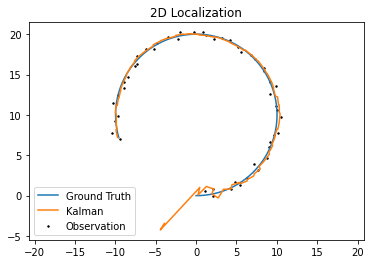

In [3]:
n_traj = 1000
obs_freq = 20
dt = 0.1        
model = Localization()
kalman = KalmanFilter(model)
init_cov = gs.array([1.0, 5.0, 10.0])
init_cov = algebra_utils.from_vector_to_diagonal_matrix(init_cov)
prop_cov = 0.0001 * gs.eye(model.dim_noise)
obs_cov = 0.1 * gs.eye(model.dim_obs)
initial_covs = (init_cov, prop_cov, obs_cov)
kalman.initialize_covariances(*initial_covs)

true_state = gs.zeros(model.dim)
true_inputs = [gs.array([dt, 0.5, 0.0, 0.05]) for _ in range(n_traj)]

true_traj, inputs, observations = create_data(kalman, true_state, true_inputs, obs_freq )

initial_state = gs.array(np.random.multivariate_normal(true_state, init_cov))
initial_state = gs.cast(initial_state, true_state.dtype)
estimate, uncertainty = estimation(kalman, initial_state, inputs, observations, obs_freq)

plt.figure()
plt.plot(true_traj[:, 1], true_traj[:, 2], label="Ground Truth")
plt.plot(estimate[:, 1], estimate[:, 2], label="Kalman")
plt.scatter(observations[:, 0], observations[:, 1], s=2, c="k", label="Observation")
plt.legend()
plt.axis("equal")
plt.title("2D Localization")

plt.show()      
        

In [7]:
initial_state


array([-2.16512558, -3.9280356 , -3.43668499])